
- **Nama:** Dicky Ary Setiawan
- **Email:** DickyAry54@gmail.com
- **ID Dicoding:** ruhe54

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Memuat Dataset

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dicoding/10.Machine Learning Terapan/submition2/goodreads_data.csv')
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


Mengetahui colom apa saja yang terdapat pada dataframe

In [4]:
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

Mengetahui typedata pada setiap colom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


melihat statistik deskriptif dari dataframe

In [6]:
df.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


Mengetahui jumlah data yang sama pada dataframe

In [7]:
df.duplicated().sum()

0

Melakukan drop value [] dari colom genres

In [8]:
df = df.drop(df[df['Genres'] == '[]'].index)

Mengetahui apakah terdapat nilai Na

In [9]:
df.isna().sum()

,0
Unnamed: 0,0
Book,0
Author,0
Description,40
Genres,0
Avg_Rating,0
Num_Ratings,0
URL,0


Melakukan dropna untuk menghilangkan nilai Na

In [10]:
clean_df = df.dropna()
clean_df.isna().sum()

,0
Unnamed: 0,0
Book,0
Author,0
Description,0
Genres,0
Avg_Rating,0
Num_Ratings,0
URL,0


Melakukan plot dengan nilai X=rating dan Y=jumlah buku

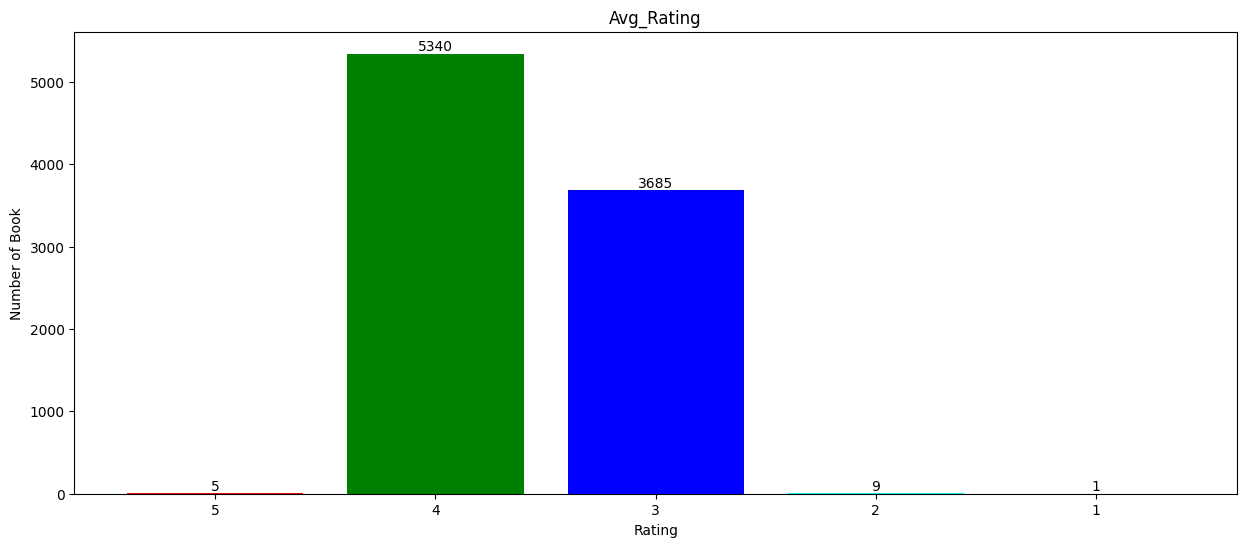

In [11]:
rating_5 = df.Avg_Rating[(df.Avg_Rating == 5)]
rating_4 = df.Avg_Rating[(df.Avg_Rating >= 4) & (df.Avg_Rating < 5)]
rating_3 = df.Avg_Rating[(df.Avg_Rating >= 3) & (df.Avg_Rating < 4)]
rating_2 = df.Avg_Rating[(df.Avg_Rating >= 2) & (df.Avg_Rating < 3)]
rating_1 = df.Avg_Rating[(df.Avg_Rating >= 1) & (df.Avg_Rating < 2)]

x = ["5", "4", "3", "2", "1"]
y = [len(rating_5.values), len(rating_4.values), len(rating_3.values), len(rating_2.values), len(rating_1.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Avg_Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Book")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Melihat buku dengan rating dibawah 2

In [12]:
df[df.Avg_Rating <=2 ].sort_values(by='Num_Ratings', ascending=False).head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
5908,5908,They Called Me Wyatt,Natasha Tynes,From REBELLER comes a new thriller by author N...,"['Fiction', 'Mystery', 'Crime', 'Adult']",1.64,"2,302",https://www.goodreads.com/book/show/40643628-t...


Insight yang didapatkan:
1. jumlah buku paling banyak berada pada rating 4
2. buku dengan rating paling rendah adalah They Called Me Wyatt karangan Natasha Tynes dengan rating 1.64 dengan jumlah orang yang merating berjumlah 2302
3. jumlah buku dengan rating diatas 4 berjumlah 5 buku
4. buku dengan rating dibawah 2 ternyata hanya satu buku saja yang berjudul "They Called Me Wyatt" karya Natasha Tynes

# **3. Data Prosesing**

Membuat variable baru untuk merubah dari series menjadi list

In [13]:
book_name = clean_df['Book'].tolist()
genre = clean_df['Genres'].tolist()
rating = clean_df['Avg_Rating'].tolist()

print(len(book_name))
print(len(genre))
print(len(rating))

9000
9000
9000


Merubah nama colom

In [14]:
new_df ={'rating':rating ,'Book':book_name, 'Genres':genre }
new_df = pd.DataFrame(new_df)
new_df.head()

,rating,Book,Genres
0,4.27,To Kill a Mockingbird,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,4.47,Harry Potter and the Philosopher’s Stone (Harr...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,4.28,Pride and Prejudice,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,4.18,The Diary of a Young Girl,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,3.98,Animal Farm,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


In [15]:
tf = TfidfVectorizer()
tf.fit(new_df['Genres'])
tf.get_feature_names_out()

array(['12th', '15th', '16th', '17th', '18th', '19th', '20th', '21st',
       'about', 'abuse', 'academia', 'academic', 'acceptance', 'action',
       'activism', 'adhd', 'adoption', 'adult', 'adventure', 'africa',
       'african', 'age', 'agriculture', 'alchemy', 'algeria', 'aliens',
       'alternate', 'amazon', 'america', 'american', 'americana',
       'americans', 'amish', 'anarchism', 'ancient', 'and', 'angels',
       'animal', 'animals', 'anthologies', 'anthropology', 'anti',
       'apocalyptic', 'archaeology', 'architecture', 'art', 'arthurian',
       'artificial', 'arts', 'asexual', 'asia', 'asian', 'astrology',
       'astronomy', 'atheism', 'audiobook', 'australia', 'authors',
       'autistic', 'autobiography', 'aviation', 'awards', 'bande',
       'banned', 'baseball', 'basketball', 'batman', 'bdsm', 'beast',
       'beauty', 'biblical', 'biography', 'biology', 'birds', 'bizarro',
       'boarding', 'book', 'books', 'botswana', 'brain', 'brazil',
       'british', 'bud

In [16]:
tfidf_matrix = tf.fit_transform(new_df['Genres'])
tfidf_matrix.shape

(9000, 583)

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [17]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=new_df.Book
).sample(22, axis=1).sample(10, axis=0)


,futuristic,architecture,romanticism,nursery,french,unicorns,retellings,weird,civil,race,...,folk,malawi,religion,utopia,archaeology,care,management,gothic,vegetarian,prehistory
Book,,,,,,,,,,,,,,,,,,,,,
"Mary Poppins (Mary Poppins, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"New Spring (The Wheel of Time, #0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
The House at Riverton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.525803,0.0,0.0
End of the Spear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.362338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
The Manchurian Candidate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Maximum City: Bombay Lost and Found,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"Birdman (Jack Caffery, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"Crashing Back Down (Crashing, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
The Girl in the Box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# **4. Modelling**

In [19]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.26538996, 0.67361842, ..., 0.04228399, 0.03963205,
        0.06542429],
       [0.26538996, 1.        , 0.12746548, ..., 0.07686169, 0.01897585,
        0.06265038],
       [0.67361842, 0.12746548, 1.        , ..., 0.04745936, 0.04448283,
        0.19269855],
       ...,
       [0.04228399, 0.07686169, 0.04745936, ..., 1.        , 0.1777464 ,
        0.        ],
       [0.03963205, 0.01897585, 0.04448283, ..., 0.1777464 , 1.        ,
        0.        ],
       [0.06542429, 0.06265038, 0.19269855, ..., 0.        , 0.        ,
        1.        ]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku

In [20]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=new_df.Book, columns=new_df.Book)
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9000, 9000)


Book,All the Missing Girls,When She Returned,Life After God,The Fairy's Tale (The Magic Triangle Trilogy #1),Life... Love... Kumbh...
Book,,,,,
Verland: The Transformation,0.350343,0.323609,0.018039,0.000000,0.000000
Einstein: His Life and Universe,0.074290,0.054787,0.000000,0.000000,0.000000
The Consolations of Philosophy,0.086251,0.063609,0.000000,0.000000,0.104292
"The Hunger Games (The Hunger Games, #1)",0.112621,0.034497,0.044527,0.318999,0.075846
Bentwhistle The Dragon in A Chilling Revelation (Book 2),0.076209,0.000000,0.000000,0.000000,0.000000
A Happy Marriage,0.028245,0.020830,0.142053,0.000000,0.000000
Life's That Way,0.044161,0.000000,0.000000,0.000000,0.000000
"The Lightning Thief (Percy Jackson and the Olympians, #1)",0.074603,0.014420,0.018613,0.000000,0.216610
"Illuminae (The Illuminae Files, #1)",0.219827,0.112446,0.045547,0.326311,0.077585


In [21]:
new_df[new_df.Book.eq('Big Fish')]


,rating,Book,Genres
2122,3.68,Big Fish,"['Fiction', 'Fantasy', 'Magical Realism', 'Con..."


Rekomendasi berdasarkan nama buku dengan nilai cosine similaity 10 tertinggi

In [22]:
book = 'Big Fish'
book_index = cosine_sim_df.index.get_loc(book)
top_10 = cosine_sim_df.iloc[book_index].sort_values(ascending=False)[1:11]

print(f'Top 10 similar books to {book}:')
print(top_10)

Top 10 similar books to Big Fish:
Book
The Midnight Library                          0.828007
Jitterbug Perfume                             0.809525
Skinny Legs and All                           0.809525
The Summer that Melted Everything             0.800500
The Particular Sadness of Lemon Cake          0.797892
There Will Be Lies                            0.780896
The Milagro Beanfield War                     0.765694
Still Life with Woodpecker                    0.755437
The Ocean at the End of the Lane              0.754604
The Improbable Wonders of Moojie Littleman    0.751683
Name: Big Fish, dtype: float64


# **5. Evaluation**

In [30]:
k = 10
threshold = 0.75
book_ratings = top_10.values
book_relevances = book_ratings > threshold
precision = len(book_ratings[book_relevances]) / k
print(f'The precision of the recommendation system is {precision:.1%}')

The precision of the recommendation system is 100.0%


In [29]:
len(book_ratings[book_relevances])

10

Menjawab Pertanyaan :
1. apakah genre paling populer?
2. siapakah penulis buku dengan jumlah terbanyak? dan buku apa yang paling populer berdasarkan Num_Ratingnya?
3. buku apa yang memiliki Avg_Rating paling tinggi dengan Num_Rating diatas 2.000.000? dan buku apa yang memiliki cosine_similarity yang paling tinggi dengan buku Avg_rating tertinggi tersebut?

1. apakah genre paling populer?

<ipython-input-23-bfc92809d2b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


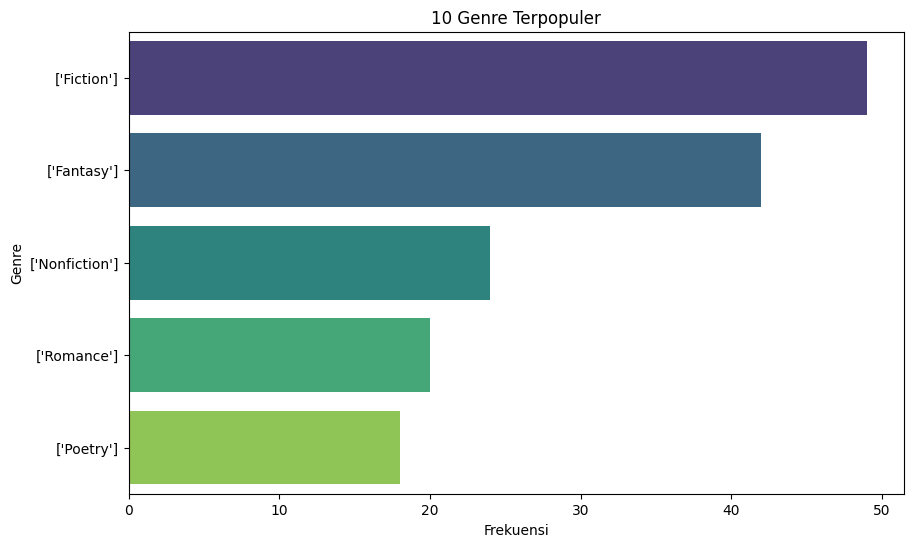

In [23]:
value_counts = df['Genres'].value_counts()
top_values = value_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")
plt.title("10 Genre Terpopuler")
plt.xlabel("Frekuensi")
plt.ylabel("Genre")
plt.show()

2. siapakah penulis buku dengan jumlah terbanyak? dan buku apa yang paling populer berdasarkan Avg_Rating?

In [24]:
df.groupby('Author').count().sort_values(by='Book', ascending=False)

,Unnamed: 0,Book,Description,Genres,Avg_Rating,Num_Ratings,URL
Author,,,,,,,
Stephen King,57,57,57,57,57,57,57
William Shakespeare,39,39,39,39,39,39,39
Terry Pratchett,35,35,35,35,35,35,35
Agatha Christie,33,33,33,33,33,33,33
Anonymous,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...
Izzeldin Abuelaish,1,1,1,1,1,1,1
J. Abram Barneck,1,1,1,1,1,1,1
J. Cafesin,1,1,1,1,1,1,1


In [25]:
populer_df = df[df.Author.eq('Stephen King')]
populer_df.sort_values(by='Avg_Rating', ascending=False).head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
2733,2733,The Dark Tower Series: Books 1-7,Stephen King,時間も空間も変転する異界の地〈中間世界〉。最後の拳銃使いローランドは、宿敵である〈黒衣の男〉...,"['Fantasy', 'Fiction', 'Horror', 'Science Fict...",4.61,"11,431",https://www.goodreads.com/book/show/12274389-t...
3259,3259,Rita Hayworth and Shawshank Redemption,Stephen King,"Andy Dufresne, a banker, was convicted of kill...","['Fiction', 'Short Stories', 'Horror', 'Thrill...",4.51,"36,550",https://www.goodreads.com/book/show/39664.Rita...
291,291,The Green Mile,Stephen King,"At Cold Mountain Penitentiary, along the lonel...","['Horror', 'Fiction', 'Fantasy', 'Thriller', '...",4.47,"298,637",https://www.goodreads.com/book/show/11566.The_...
1044,1044,The Dark Tower #1-3,Stephen King,Titles include The Dark Tower I: The Gunslinge...,"['Fantasy', 'Fiction', 'Horror', 'Science Fict...",4.46,"8,378",https://www.goodreads.com/book/show/458450.The...
426,426,Different Seasons,Stephen King,This Book is in Good Condition. Used Copy With...,"['Horror', 'Fiction', 'Short Stories', 'Thrill...",4.35,"196,795",https://www.goodreads.com/book/show/39662.Diff...


3. buku apa yang memiliki Avg_Rating paling tinggi dengan Num_Rating diatas 2.000.000? dan buku apa yang memiliki cosine_similarity yang paling tinggi dengan buku Avg_rating tertinggi tersebut?

In [26]:
df3 = df['Num_Ratings'].str.replace(',', '').astype(float)
avg_df = df.sort_values(by='Num_Ratings', ascending=False)
avg_df = avg_df[df3 > 2000000]
avg_df.head()

<ipython-input-26-4b49970ad9d7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_df = avg_df[df3 > 2000000]


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
8608,8608,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,"7,963,186",https://www.goodreads.com/book/show/12187803-t...
4894,4894,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,"7,963,186",https://www.goodreads.com/book/show/18626858-t...
4868,4868,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,"7,963,186",https://www.goodreads.com/book/show/12091570-t...
6275,6275,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,"7,963,186",https://www.goodreads.com/book/show/13616052-h...


In [27]:
book2 = 'Harry Potter and the Philosopher’s Stone (Harry Potter, #1)'
book_index2 = cosine_sim_df.index.get_loc(book2)
top_10_2 = cosine_sim_df.iloc[book_index2].sort_values(ascending=False)[1:11]

print(f'Top 10 similar books to {book2}:')
print(top_10_2)

Top 10 similar books to Harry Potter and the Philosopher’s Stone (Harry Potter, #1):
Book
The Enchanted Castle                                           1.000000
Harry Potter and the Philosopher’s Stone (Harry Potter, #1)    1.000000
Howl’s Moving Castle (Howl’s Moving Castle, #1)                0.927614
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    0.920868
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     0.920868
Harry Potter and the Goblet of Fire (Harry Potter, #4)         0.920868
Quidditch Through the Ages                                     0.920868
Fantastic Beasts and Where to Find Them                        0.920868
The Girl Who Drank the Moon                                    0.920868
Charmed Life (Chrestomanci, #1)                                0.915649
Name: Harry Potter and the Philosopher’s Stone (Harry Potter, #1), dtype: float64


Menjawab Pertanyaan:

1. apakah genre paling populer?

  Genre buku paling populer adalah Fiction dan disusul oleh Fantasy dan Nonfiction.

2. siapakah penulis buku dengan jumlah terbanyak? dan buku apa yang paling populer berdasarkan Avg_Rating?

  Penulis dengan jumlah buku terbanyak adalah Stephen King dengan jumlah buku sebanyak 57 dengan buku paling tinggi nilai scorenya adalah "The Dark Tower Series: Books 1-7" dengan score 4.61 dengan jumlah orang yang memberikan review 11,431 orang.

3. buku apa yang memiliki Avg_Rating paling tinggi dengan Num_Rating diatas 500.000? dan buku apa yang memiliki cosine_similarity yang paling tinggi dengan buku Avg_rating tertinggi tersebut?

  buku dengan kriteria jumlah user yang memberikan rating diatas 2.000.000 dan memiliki rating paling baik adalah buku yang berjudul "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)" karya J.K. Rowling.
  buku ini memilki cosine similarity paling tinggi dengan buku yang berjudul "The Enchanted Castle " dengan memiliki cosine similarity bernilai 1.